# Decision Tree and random forest classification with Python

We'll try to use decision tree and  random forest to create a model that directly predicts weather a customer is going to purchase a product or not based on the age and estimated saraly.

Let's grab it and use it!

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Check for null values

<AxesSubplot:>

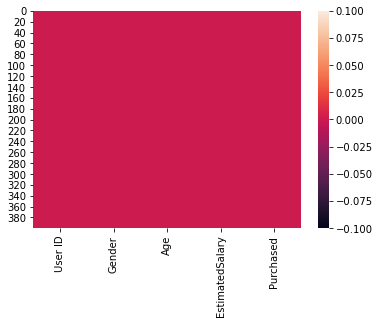

In [5]:
sns.heatmap(dataset.isnull())

In [6]:
dataset.drop(['Gender','User ID'], axis=1, inplace=True)

## Check correlation

<AxesSubplot:>

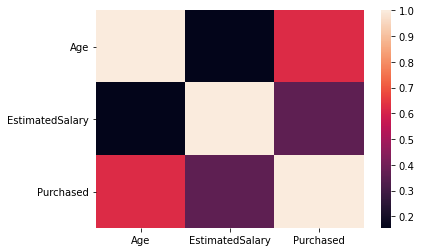

In [7]:
sns.heatmap(dataset.corr())

## Standardize the Variables

Because the Decision tree classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the decision tree classifier, than variables that are on a small scale.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(dataset.drop('Purchased',axis=1))

StandardScaler()

In [11]:
scaled_features = scaler.transform(dataset.drop('Purchased',axis=1))

In [12]:
df_feat = pd.DataFrame(scaled_features,columns=['Age', 'EstimatedSalary'])
df_feat.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


## Train Test Split

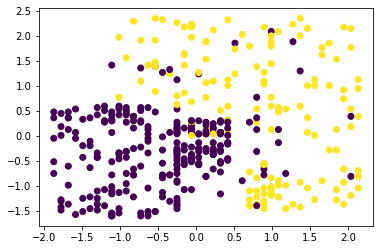

In [13]:
plt.scatter(df_feat['Age'] , df_feat['EstimatedSalary'] , c=dataset['Purchased'] )


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,dataset['Purchased'],
                                                    test_size=0.30)

## Using decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = classifier.predict(X_test)

## Predictions and Evaluations

Let's evaluate our decision tree model!

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[68, 15],
       [ 8, 29]], dtype=int64)

[Text(676.8503289473684, 1045.3846153846155, 'X[0] <= 0.463\ngini = 0.471\nsamples = 280\nvalue = [174, 106]'),
 Text(348.75, 961.7538461538462, 'X[1] <= 0.61\ngini = 0.281\nsamples = 195\nvalue = [162, 33]'),
 Text(146.8421052631579, 878.123076923077, 'X[0] <= -0.11\ngini = 0.07\nsamples = 165\nvalue = [159, 6]'),
 Text(110.13157894736841, 794.4923076923078, 'gini = 0.0\nsamples = 110\nvalue = [110, 0]'),
 Text(183.55263157894737, 794.4923076923078, 'X[1] <= -0.066\ngini = 0.194\nsamples = 55\nvalue = [49, 6]'),
 Text(146.8421052631579, 710.8615384615384, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(220.26315789473682, 710.8615384615384, 'X[0] <= -0.015\ngini = 0.337\nsamples = 28\nvalue = [22, 6]'),
 Text(73.42105263157895, 627.2307692307693, 'X[1] <= 0.066\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(36.71052631578947, 543.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(110.13157894736841, 543.6, 'X[1] <= 0.228\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(7

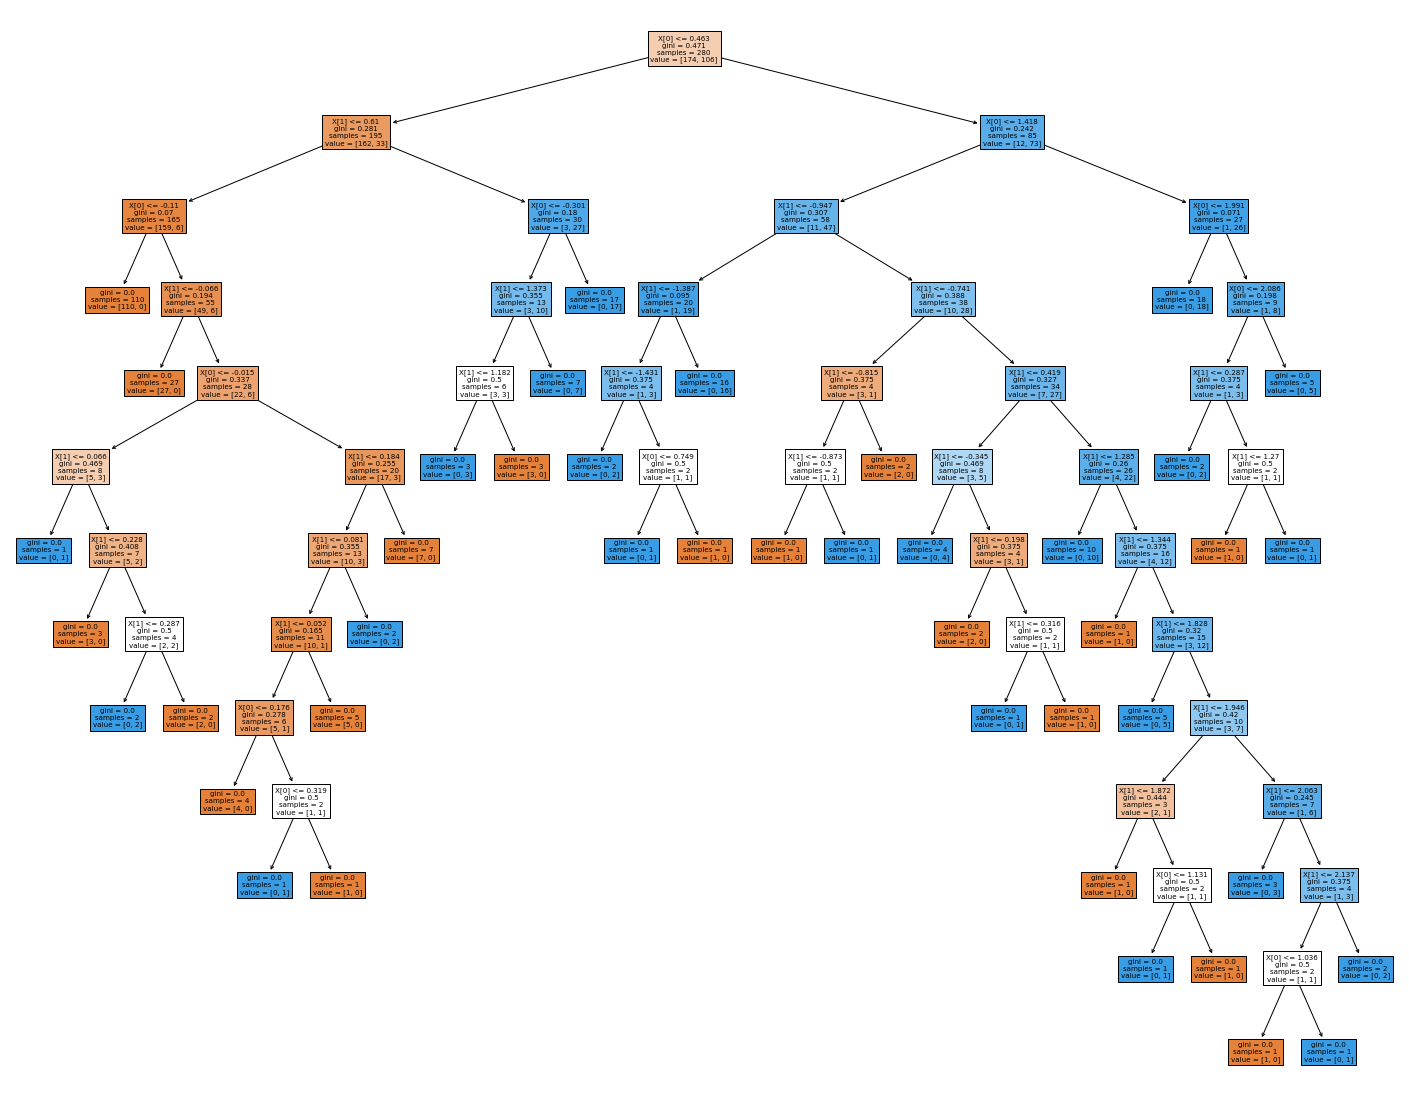

In [29]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(classifier, filled = True)

## Using random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rfc_pred = rfc.predict(X_test)

## Predictions and Evaluations

Let's evaluate our random forest model!

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)

In [30]:
cm

array([[68, 15],
       [ 8, 29]], dtype=int64)

In [32]:
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1312529068),
 DecisionTreeClassifier(max_features='auto', random_state=1722360945),
 DecisionTreeClassifier(max_features='auto', random_state=1395427036),
 DecisionTreeClassifier(max_features='auto', random_state=1592969691),
 DecisionTreeClassifier(max_features='auto', random_state=661784164),
 DecisionTreeClassifier(max_features='auto', random_state=2005205310),
 DecisionTreeClassifier(max_features='auto', random_state=1084035357),
 DecisionTreeClassifier(max_features='auto', random_state=1316635830),
 DecisionTreeClassifier(max_features='auto', random_state=1607496400),
 DecisionTreeClassifier(max_features='auto', random_state=1711004502),
 DecisionTreeClassifier(max_features='auto', random_state=926823691),
 DecisionTreeClassifier(max_features='auto', random_state=1903318110),
 DecisionTreeClassifier(max_features='auto', random_state=1083863652),
 DecisionTreeClassifier(max_features='auto', random_state=330887057),
 Decision

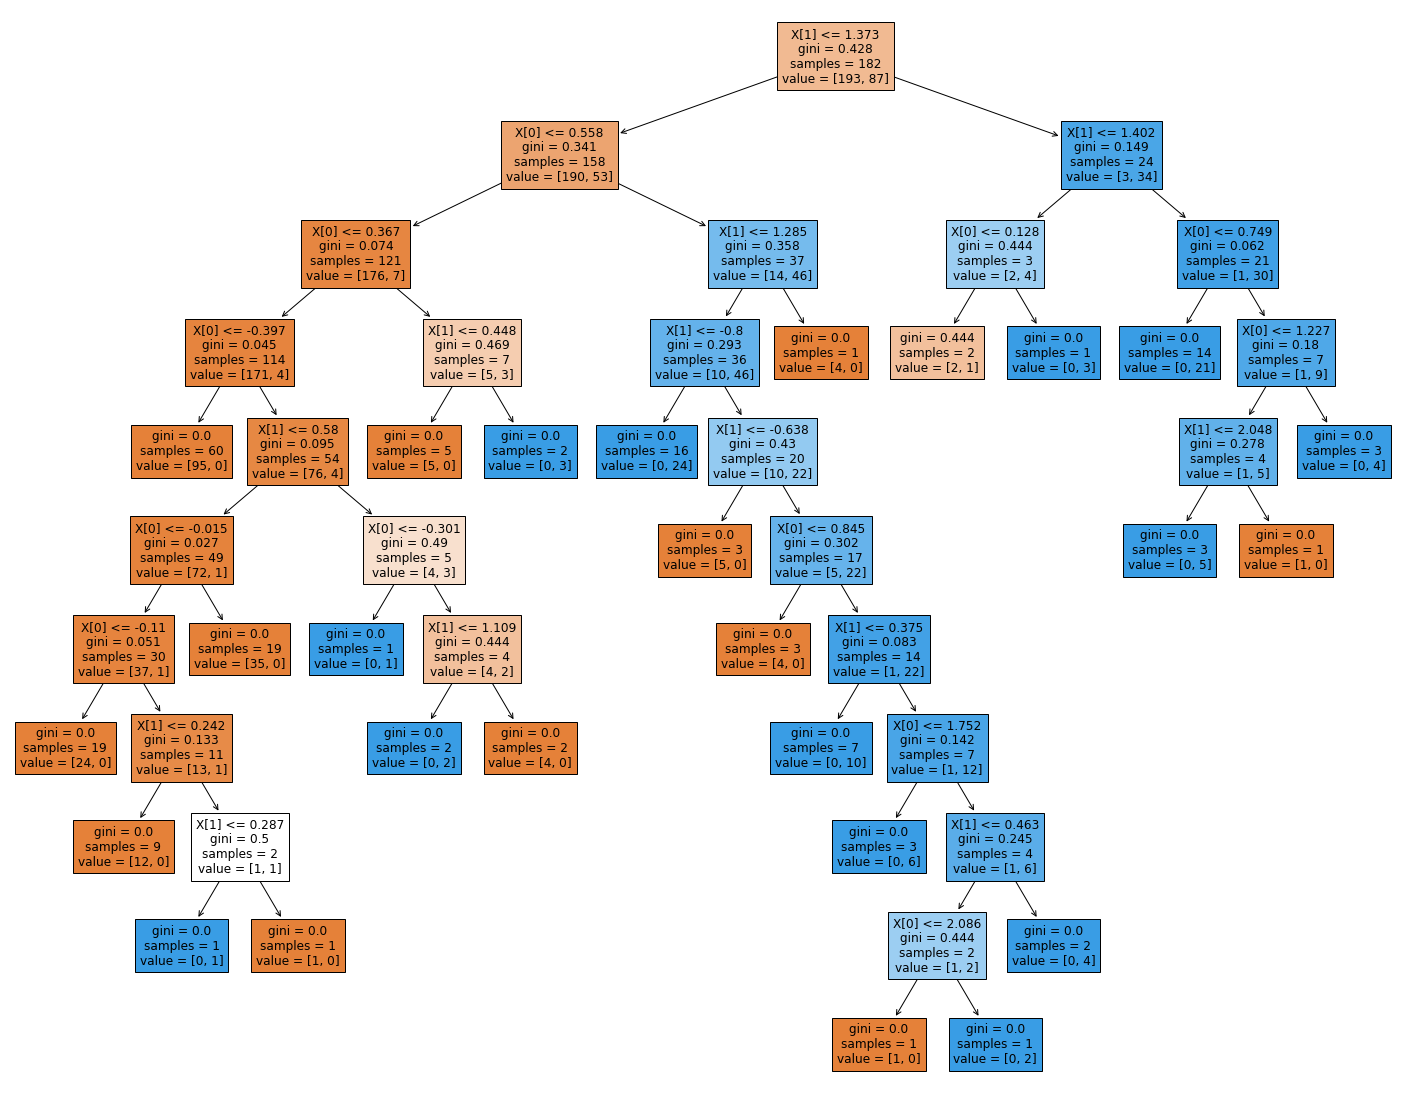

In [33]:
plt.figure(figsize=(25,20))
for i in range(len(rfc.estimators_)):
               tree.plot_tree(rfc.estimators_[i], filled = True)

# Great Job!